In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Opening Train Set...

In [2]:
PATH = "D:/Program Files (x86)/Jupyter Projects/"
filepath = PATH + "mpc_train.csv"
train = pd.read_csv(filepath)
train

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

Opening Test Set...

In [3]:
PATH = "D:/Program Files (x86)/Jupyter Projects/"
filepath = PATH + "mpc_test.csv"
test = pd.read_csv(filepath)
test

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]

### Exploratory Data Analysis & Preprocessing

Checking Train Data info...

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Describing Train Data...

In [5]:
train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

Generating Heatmap...

In [6]:
train_corr = train.corr()
train_corr

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

<AxesSubplot:>

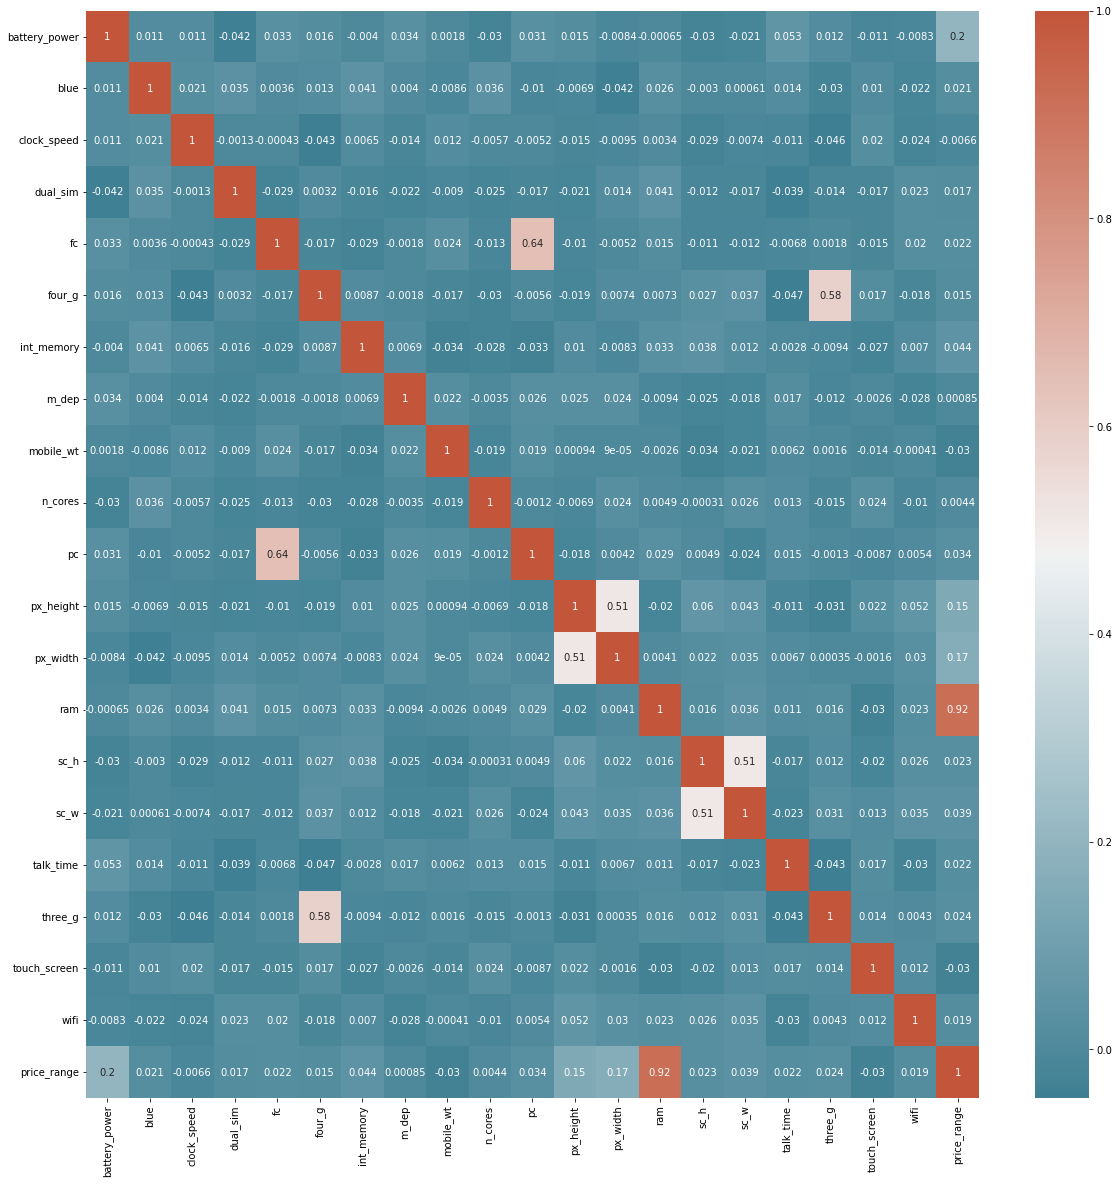

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(train_corr, xticklabels=train_corr.columns, yticklabels=train_corr.columns, annot=True, cmap=sns.diverging_palette(220,20, as_cmap=True), ax=ax)

Checking for categorical columns...

In [14]:
train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

Trying Chi-square test on 4g to Price...

In [12]:
contingency_4g_vs_price = pd.crosstab(train['four_g'],train['price_range'])
contingency_4g_vs_price

price_range    0    1    2    3
four_g                         
0            241  238  253  225
1            259  262  247  275

In [13]:
from scipy.stats import chi2_contingency

c, p, dof, expected  = chi2_contingency(contingency_4g_vs_price)
c, p, dof

(3.179879597375548, 0.36471408196943356, 3)

Creating independent variable's dataframe...

In [15]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
Xtrain = train[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
        'talk_time','touch_screen', 'wifi']]

In [5]:
Xtrain['px_area'] = train['px_height'] * train['px_width']
Xtrain['sc_area'] = train['sc_h'] * train['sc_w']

C:\Users\sixbo\AppData\Local\Temp\ipykernel_6232\346792771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['px_area'] = train['px_height'] * train['px_width']
C:\Users\sixbo\AppData\Local\Temp\ipykernel_6232\346792771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['sc_area'] = train['sc_h'] * train['sc_w']


In [6]:
Xtrain

battery_power  blue  clock_speed  dual_sim  four_g  int_memory  m_dep  \
0               842     0          2.2         0       0           7    0.6   
1              1021     1          0.5         1       1          53    0.7   
2               563     1          0.5         1       1          41    0.9   
3               615     1          2.5         0       0          10    0.8   
4              1821     1          1.2         0       1          44    0.6   
...             ...   ...          ...       ...     ...         ...    ...   
1995            794     1          0.5         1       1           2    0.8   
1996           1965     1          2.6         1       0          39    0.2   
1997           1911     0          0.9         1       1          36    0.7   
1998           1512     0          0.9         0       1          46    0.1   
1999            510     1          2.0         1       1          45    0.9   

      mobile_wt  n_cores  pc  talk_time  touch_screen  wifi  px_area  sc_area  
0           188        2   2         19             0     1    15120       63  
1           136        3   6          7             1     0  1799140       51  
2           145        5   6          9             1     0  2167308       22  
3           131        6   9         11             0     0  2171776      128  
4           141        2  14         15             1     0  1464096       16  
...         ...      ...  ..        ...           ...   ...      ...      ...  
1995        106        6  14         19             1     0  2309580       52  
1996        187        4   3         16             1     1  1797975      110  
1997        108        8   3          5             1     0  1416576        9  
1998        145        5   5         19             1     1   225120      180  
1999        168        6  16          2             1     1   364182       76  

[2000 rows x 15 columns]

Similarly for Test...

In [7]:
Xtest = test[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
        'talk_time','touch_screen', 'wifi']]
Xtest['px_area'] = test['px_height'] * test['px_width']
Xtest['sc_area'] = test['sc_h'] * test['sc_w']
Xtest

C:\Users\sixbo\AppData\Local\Temp\ipykernel_6232\2371809675.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtest['px_area'] = test['px_height'] * test['px_width']
C:\Users\sixbo\AppData\Local\Temp\ipykernel_6232\2371809675.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtest['sc_area'] = test['sc_h'] * test['sc_w']


battery_power  blue  clock_speed  dual_sim  four_g  int_memory  m_dep  \
0             1043     1          1.8         1       0           5    0.1   
1              841     1          0.5         1       1          61    0.8   
2             1807     1          2.8         0       0          27    0.9   
3             1546     0          0.5         1       1          25    0.5   
4             1434     0          1.4         0       1          49    0.5   
..             ...   ...          ...       ...     ...         ...    ...   
995           1700     1          1.9         0       1          54    0.5   
996            609     0          1.8         1       0          13    0.9   
997           1185     0          1.4         0       1           8    0.5   
998           1533     1          0.5         1       0          50    0.4   
999           1270     1          0.5         0       1          35    0.1   

     mobile_wt  n_cores  pc  talk_time  touch_screen  wifi  px_area  sc_area  
0          193        3  16          2             1     0   319112       84  
1          191        5  12          7             0     0   639322        0  
2          186        3   4         10             1     1  1734820      170  
3           96        8  20          7             1     0   516840        0  
4          108        6  18          7             0     1   606690      120  
..         ...      ...  ..        ...           ...   ...      ...      ...  
995        170        7  17         15             1     0   587972      112  
996        186        4   2         19             1     1  1880064        8  
997         80        1  12         14             0     0   393525        0  
998        171        2  12          6             1     0    31616      165  
999        140        6  19          3             0     1   277856       18  

[1000 rows x 15 columns]

Setting the Ys...

In [16]:
Ytrain = train['ram']
Ytest = test['ram']

Standardizing...

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
Xtrain_scaled_features = Xtrain.copy()
Xtest_scaled_features  = Xtest.copy()

In [10]:
col_names = ['battery_power','clock_speed','int_memory','m_dep','mobile_wt','pc','talk_time','px_area','sc_area']
train_features = Xtrain_scaled_features[col_names]
test_features = Xtest_scaled_features[col_names]

scaler = StandardScaler().fit(train_features.values)
train_features = scaler.transform(train_features.values)

scaler = StandardScaler().fit(test_features.values)
test_features = scaler.transform(test_features.values)

Xtrain_scaled_features[col_names] = train_features
Xtest_scaled_features[col_names] = test_features

In [11]:
Xtrain_scaled_features

battery_power  blue  clock_speed  dual_sim  four_g  int_memory  \
0         -0.902597     0     0.830779         0       0   -1.380644   
1         -0.495139     1    -1.253064         1       1    1.155024   
2         -1.537686     1    -1.253064         1       1    0.493546   
3         -1.419319     1     1.198517         0       0   -1.215274   
4          1.325906     1    -0.395011         0       1    0.658915   
...             ...   ...          ...       ...     ...         ...   
1995      -1.011860     1    -1.253064         1       1   -1.656260   
1996       1.653694     1     1.321096         1       0    0.383299   
1997       1.530773     0    -0.762748         1       1    0.217930   
1998       0.622527     0    -0.762748         0       1    0.769162   
1999      -1.658331     1     0.585621         1       1    0.714039   

         m_dep  mobile_wt  n_cores        pc  talk_time  touch_screen  wifi  \
0     0.340740   1.349249        2 -1.305750   1.462493             0     1   
1     0.687548  -0.120059        3 -0.645989  -0.734267             1     0   
2     1.381165   0.134244        5 -0.645989  -0.368140             1     0   
3     1.034357  -0.261339        6 -0.151168  -0.002014             0     0   
4     0.340740   0.021220        2  0.673534   0.730240             1     0   
...        ...        ...      ...       ...        ...           ...   ...   
1995  1.034357  -0.967737        6  0.673534   1.462493             1     0   
1996 -1.046495   1.320993        4 -1.140810   0.913303             1     1   
1997  0.687548  -0.911225        8 -1.140810  -1.100394             1     0   
1998 -1.393304   0.134244        5 -0.810929   1.462493             1     1   
1999  1.381165   0.784130        6  1.003414  -1.649584             1     1   

       px_area   sc_area  
0    -1.073033 -0.224686  
1     1.077541 -0.380926  
2     1.521355 -0.758506  
3     1.526741  0.621614  
4     0.673657 -0.836626  
...        ...       ...  
1995  1.692859 -0.367906  
1996  1.076137  0.387254  
1997  0.616374 -0.927766  
1998 -0.819885  1.298653  
1999 -0.652251 -0.055426  

[2000 rows x 15 columns]

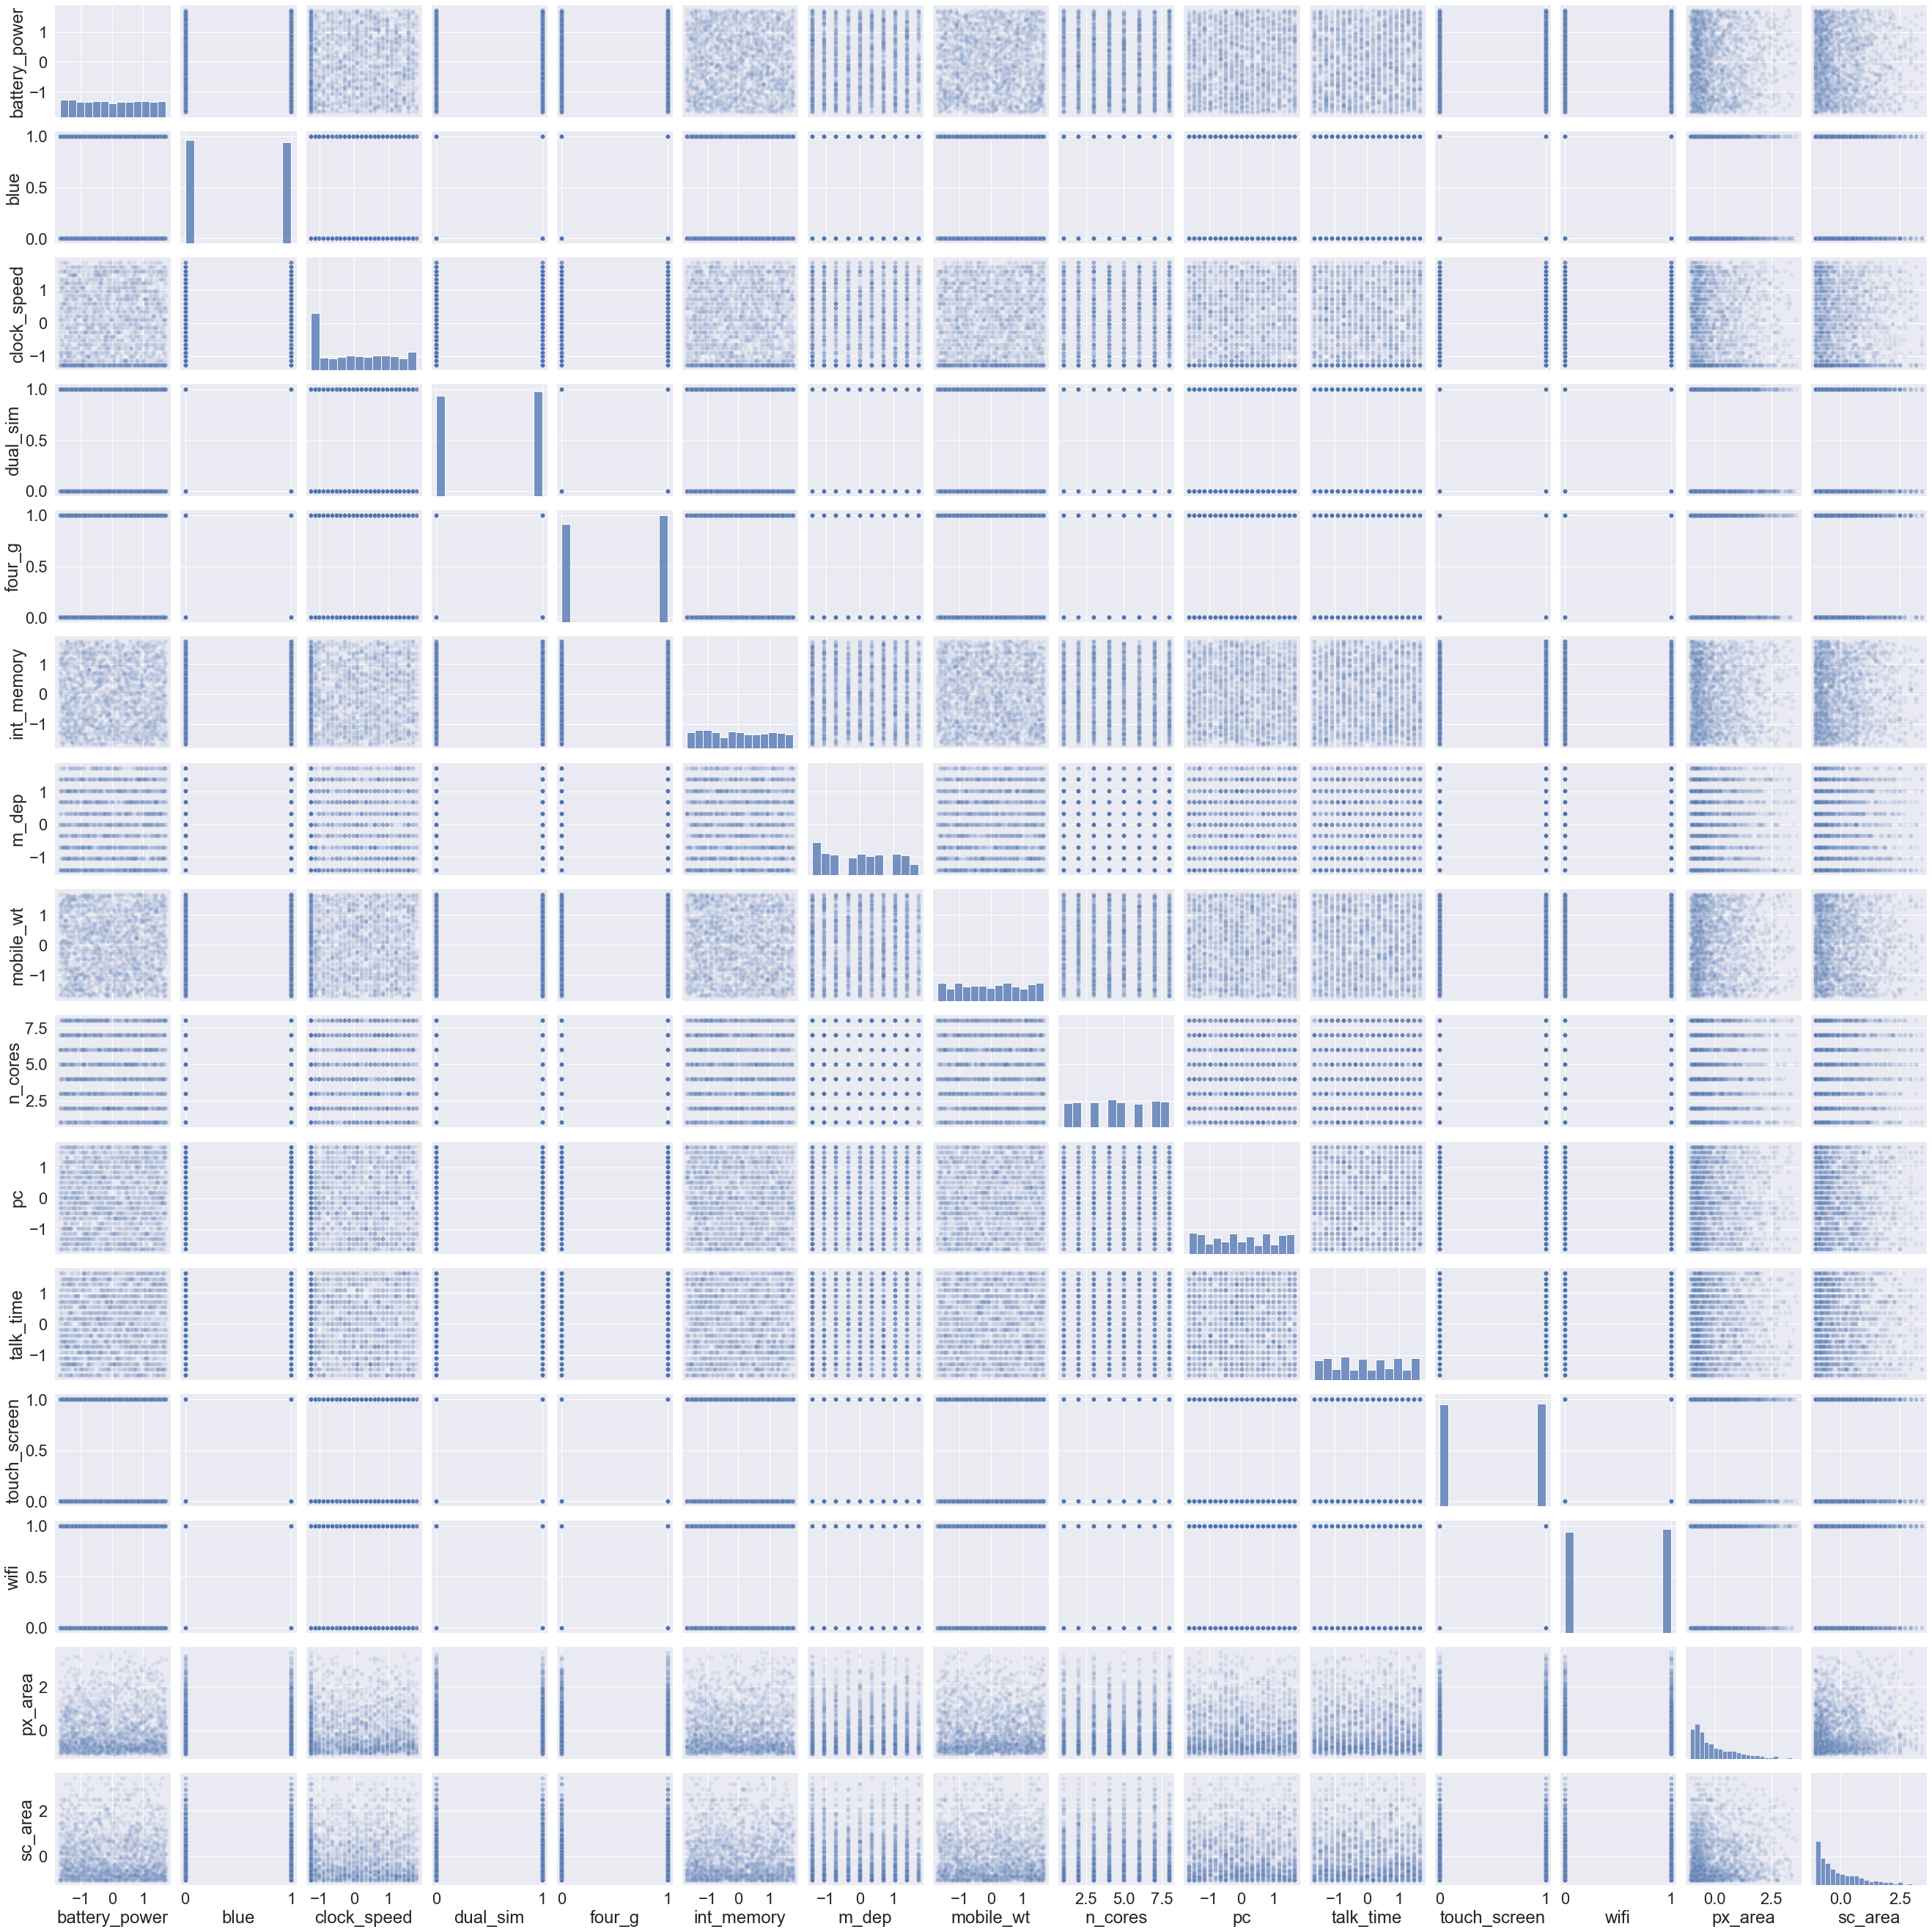

In [54]:
sns.set(font_scale=2)
sns.pairplot(Xtrain_scaled_features, kind='scatter', plot_kws={'alpha':0.1})

In [26]:
Xtest_scaled_features

battery_power  blue  clock_speed  dual_sim  four_g  int_memory     m_dep  \
0        -0.475451     1     0.312601         1       0   -1.581269 -1.487247   
1        -0.942782     1    -1.255832         1       1    1.509303  1.006341   
2         1.292077     1     1.519087         0       0   -0.367116  1.362567   
3         0.688249     0    -1.255832         1       1   -0.477493 -0.062340   
4         0.429135     0    -0.169994         0       1    0.847037 -0.062340   
..             ...   ...          ...       ...     ...         ...       ...   
995       1.044531     1     0.433249         0       1    1.122981 -0.062340   
996      -1.479519     0     0.312601         1       0   -1.139759  1.362567   
997      -0.146932     0    -0.169994         0       1   -1.415702 -0.062340   
998       0.658173     1    -1.255832         1       0    0.902226 -0.418566   
999       0.049718     1    -1.255832         0       1    0.074394 -1.487247   

     mobile_wt  n_cores        pc  talk_time  touch_screen  wifi   px_area  \
0     1.535535        3  0.976026  -1.653355             1     0 -0.699897   
1     1.478120        5  0.319433  -0.743418             0     0 -0.297401   
2     1.334582        3 -0.993754  -0.197456             1     1  1.079612   
3    -1.249091        8  1.632619  -0.743418             1     0 -0.451358   
4    -0.904602        6  1.304323  -0.743418             0     1 -0.338419   
..         ...      ...       ...        ...           ...   ...       ...   
995   0.875263        7  1.140174   0.712481             1     0 -0.361947   
996   1.334582        4 -1.322051   1.440430             1     1  1.262181   
997  -1.708411        1  0.319433   0.530493             0     0 -0.606362   
998   0.903970        2  0.319433  -0.925406             1     0 -1.061272   
999   0.014038        6  1.468471  -1.471368             0     1 -0.751755   

      sc_area  
0    0.149607  
1   -0.978895  
2    1.304978  
3   -0.978895  
4    0.633251  
..        ...  
995  0.525774  
996 -0.871418  
997 -0.978895  
998  1.237805  
999 -0.737073  

[1000 rows x 15 columns]

### Applying Linear Regression

Random Search for best Elastic Net parameters...

In [34]:
from sklearn.linear_model import ElasticNet
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

elastic = ElasticNet()
distributions = dict(alpha=uniform(loc=0, scale=2),l1_ratio = uniform(loc=0, scale=1))
clf = RandomizedSearchCV(elastic, distributions, n_iter=500, random_state=123)
search = clf.fit(Xtrain_scaled_features, Ytrain)
search.best_params_

{'alpha': 1.9978368119455951, 'l1_ratio': 0.04061612455845953}

Generating Coefficients...

In [55]:
# elastic = ElasticNet(alpha=1.9978368119455951,l1_ratio=0.04061612455845953,max_iter=700)
elastic = ElasticNet(**search.best_params_,max_iter=700)

In [56]:
elastic.fit(Xtrain_scaled_features,Ytrain)

ElasticNet(alpha=1.9978368119455951, l1_ratio=0.04061612455845953, max_iter=700)

In [57]:
elastic.coef_

array([-0.14470749,  6.40021228,  1.31347628, 10.3462324 ,  1.76391815,
       12.19161136, -3.44269717, -0.7038566 ,  1.73317152, 10.97700468,
        4.1849571 , -7.54630807,  5.52844738, -2.49682238, 12.34124829])

In [58]:
coef = pd.Series(elastic.coef_,index=Xtrain_scaled_features.columns)
coef.sort_values()

touch_screen     -7.546308
m_dep            -3.442697
px_area          -2.496822
mobile_wt        -0.703857
battery_power    -0.144707
clock_speed       1.313476
n_cores           1.733172
four_g            1.763918
talk_time         4.184957
wifi              5.528447
blue              6.400212
dual_sim         10.346232
pc               10.977005
int_memory       12.191611
sc_area          12.341248
dtype: float64

Text(0.5, 1.0, 'Coefficients from Elastic Net')

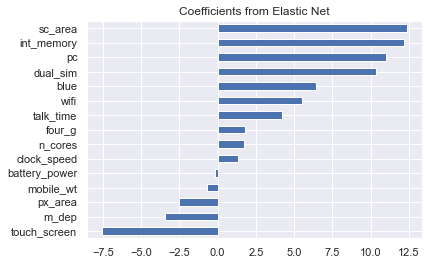

In [61]:
sns.set(font_scale=1)
coef.sort_values().plot(kind='barh')
plt.title("Coefficients from Elastic Net")

Test Regression - to narrow down to either Lasso or Ridge....

In [62]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(Xtrain_scaled_features, Ytrain)
reg.score(Xtest_scaled_features, Ytest)

-0.0013700339540549944

In [63]:
reg.coef_

array([  0.35419206,  52.37129683,   4.97153522,  89.30053169,
        15.93212984,  34.74318485,  -9.07050847,  -0.86847018,
         2.93589975,  33.65886401,  15.33514442, -64.8472034 ,
        46.79837407,  -7.69368427,  36.12941576])

Disparity in Coefficients, therefore applying Lasso regularization...

In [79]:
lasso = ElasticNet(alpha=5.0, l1_ratio=1.0, max_iter=700)

In [80]:
lasso.fit(Xtrain_scaled_features, Ytrain)

ElasticNet(alpha=5.0, l1_ratio=1.0, max_iter=700)

In [81]:
lasso.coef_

array([  0.        ,  33.52799807,   0.        ,  70.08412924,
         0.        ,  30.19440635,  -4.56506447,  -0.        ,
         1.78660741,  28.3088719 ,   9.13874567, -44.32427883,
        25.98505054,  -2.75741767,  31.31508856])

In [76]:
lasso.score(Xtest_scaled_features, Ytest)

-0.0009982256048206573

In [82]:
coef = pd.Series(lasso.coef_,index=Xtrain_scaled_features.columns)
coef.sort_values()

touch_screen    -44.324279
m_dep            -4.565064
px_area          -2.757418
battery_power     0.000000
clock_speed       0.000000
four_g            0.000000
mobile_wt        -0.000000
n_cores           1.786607
talk_time         9.138746
wifi             25.985051
pc               28.308872
int_memory       30.194406
sc_area          31.315089
blue             33.527998
dual_sim         70.084129
dtype: float64

Dropping battery power and mobile weight...

In [83]:
col_names = ['battery_power','mobile_wt','four_g','clock_speed']

reg = LinearRegression().fit(Xtrain_scaled_features.drop(columns=col_names), Ytrain)
reg.score(Xtest_scaled_features.drop(columns=col_names), Ytest)

-0.0016350665820954458

### Applying logistic regression

Creating new train and test splits to contain RAM....

In [4]:
Xtrain_2 = train[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
        'talk_time','touch_screen', 'wifi', 'ram']]
Xtrain_2['px_area'] = train['px_height'] * train['px_width']
Xtrain_2['sc_area'] = train['sc_h'] * train['sc_w']

In [5]:
Xtest_2 = test[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
        'talk_time','touch_screen', 'wifi', 'ram']]
Xtest_2['px_area'] = test['px_height'] * test['px_width']
Xtest_2['sc_area'] = test['sc_h'] * test['sc_w']

Assigning new predicted variable...

In [6]:
Ytrain_2 = train['price_range']

Standardizing...

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
Xtrain_scaled_features = Xtrain_2.copy()
Xtest_scaled_features = Xtest_2.copy()

In [9]:
col_names = ['battery_power','clock_speed','int_memory','m_dep','mobile_wt','pc','talk_time','px_area','sc_area','ram']
train_features = Xtrain_scaled_features[col_names]
test_features = Xtest_scaled_features[col_names]

scaler = StandardScaler().fit(train_features.values)
train_features = scaler.transform(train_features.values)

scaler = StandardScaler().fit(test_features.values)
test_features = scaler.transform(test_features.values)

Xtrain_scaled_features[col_names] = train_features
Xtest_scaled_features[col_names] = test_features

In [10]:
Xtrain_scaled_features

battery_power  blue  clock_speed  dual_sim  four_g  int_memory  \
0         -0.902597     0     0.830779         0       0   -1.380644   
1         -0.495139     1    -1.253064         1       1    1.155024   
2         -1.537686     1    -1.253064         1       1    0.493546   
3         -1.419319     1     1.198517         0       0   -1.215274   
4          1.325906     1    -0.395011         0       1    0.658915   
...             ...   ...          ...       ...     ...         ...   
1995      -1.011860     1    -1.253064         1       1   -1.656260   
1996       1.653694     1     1.321096         1       0    0.383299   
1997       1.530773     0    -0.762748         1       1    0.217930   
1998       0.622527     0    -0.762748         0       1    0.769162   
1999      -1.658331     1     0.585621         1       1    0.714039   

         m_dep  mobile_wt  n_cores        pc  talk_time  touch_screen  wifi  \
0     0.340740   1.349249        2 -1.305750   1.462493             0     1   
1     0.687548  -0.120059        3 -0.645989  -0.734267             1     0   
2     1.381165   0.134244        5 -0.645989  -0.368140             1     0   
3     1.034357  -0.261339        6 -0.151168  -0.002014             0     0   
4     0.340740   0.021220        2  0.673534   0.730240             1     0   
...        ...        ...      ...       ...        ...           ...   ...   
1995  1.034357  -0.967737        6  0.673534   1.462493             1     0   
1996 -1.046495   1.320993        4 -1.140810   0.913303             1     1   
1997  0.687548  -0.911225        8 -1.140810  -1.100394             1     0   
1998 -1.393304   0.134244        5 -0.810929   1.462493             1     1   
1999  1.381165   0.784130        6  1.003414  -1.649584             1     1   

           ram   px_area   sc_area  
0     0.391703 -1.073033 -0.224686  
1     0.467317  1.077541 -0.380926  
2     0.441498  1.521355 -0.758506  
3     0.594569  1.526741  0.621614  
4    -0.657666  0.673657 -0.836626  
...        ...       ...       ...  
1995 -1.342799  1.692859 -0.367906  
1996 -0.085031  1.076137  0.387254  
1997  0.860139  0.616374 -0.927766  
1998 -1.157454 -0.819885  1.298653  
1999  1.655004 -0.652251 -0.055426  

[2000 rows x 16 columns]

In [12]:
Xtest_scaled_features

battery_power  blue  clock_speed  dual_sim  four_g  int_memory     m_dep  \
0        -0.475451     1     0.312601         1       0   -1.581269 -1.487247   
1        -0.942782     1    -1.255832         1       1    1.509303  1.006341   
2         1.292077     1     1.519087         0       0   -0.367116  1.362567   
3         0.688249     0    -1.255832         1       1   -0.477493 -0.062340   
4         0.429135     0    -0.169994         0       1    0.847037 -0.062340   
..             ...   ...          ...       ...     ...         ...       ...   
995       1.044531     1     0.433249         0       1    1.122981 -0.062340   
996      -1.479519     0     0.312601         1       0   -1.139759  1.362567   
997      -0.146932     0    -0.169994         0       1   -1.415702 -0.062340   
998       0.658173     1    -1.255832         1       0    0.902226 -0.418566   
999       0.049718     1    -1.255832         0       1    0.074394 -1.487247   

     mobile_wt  n_cores        pc  talk_time  touch_screen  wifi       ram  \
0     1.535535        3  0.976026  -1.653355             1     0  1.229373   
1     1.478120        5  0.319433  -0.743418             0     0  1.614643   
2     1.334582        3 -0.993754  -0.197456             1     1  0.236313   
3    -1.249091        8  1.632619  -0.743418             1     0  1.612804   
4    -0.904602        6  1.304323  -0.743418             0     1 -0.336535   
..         ...      ...       ...        ...           ...   ...       ...   
995   0.875263        7  1.140174   0.712481             1     0 -0.016549   
996   1.334582        4 -1.322051   1.440430             1     1 -0.189415   
997  -1.708411        1  0.319433   0.530493             0     0 -0.842260   
998   0.903970        2  0.319433  -0.925406             1     0  0.340217   
999   0.014038        6  1.468471  -1.471368             0     1  0.633537   

      px_area   sc_area  
0   -0.699897  0.149607  
1   -0.297401 -0.978895  
2    1.079612  1.304978  
3   -0.451358 -0.978895  
4   -0.338419  0.633251  
..        ...       ...  
995 -0.361947  0.525774  
996  1.262181 -0.871418  
997 -0.606362 -0.978895  
998 -1.061272  1.237805  
999 -0.751755 -0.737073  

[1000 rows x 16 columns]

#### Using LogisticRegression in sklearn

Now splitting the standardized train data for model testing....

In [16]:
from sklearn.model_selection import train_test_split

In [13]:
X_newtrain, X_val, Y_newtrain, Y_val = train_test_split(Xtrain_scaled_features, Ytrain_2, test_size=0.2, random_state=42)

Comparing regular logistic regression and multinominal logistic regression...

In [52]:
from sklearn.linear_model import LogisticRegression

In [13]:
def model_compare(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [58]:
models = {'LogReg L1': LogisticRegression(penalty='l1',solver='liblinear'),
          'LogReg L2': LogisticRegression(penalty='l2'),
          'LogReg': LogisticRegression(penalty='none'),
          'SoftMax Reg': LogisticRegression(multi_class='multinomial')}

model_scores = model_compare(models=models, X_train=X_newtrain, X_test=X_val, y_train=Y_newtrain, y_test=Y_val)

model_scores

d:\Anaconda\envs\geoenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Anaconda\envs\geoenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

{'LogReg L1': 0.8625,
 'LogReg L2': 0.9275,
 'LogReg': 0.93,
 'SoftMax Reg': 0.9275}

Hyperparameter tuning on no-penalty log-reg...

In [96]:
parameter_grid = {'C': np.logspace(-4,4,20),
                  'penalty':['none']}

In [97]:
from sklearn.model_selection import RandomizedSearchCV

rscv_logreg = RandomizedSearchCV(LogisticRegression(), param_distributions=parameter_grid, cv=10, n_iter=20, verbose=True)

rscv_logreg.fit(X_newtrain, Y_newtrain)

rscv_logreg.best_params_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'penalty': 'none', 'C': 0.0001}

In [98]:
rscv_logreg.score(X_val, Y_val)

0.93

In [80]:
from sklearn.model_selection import GridSearchCV

gscv_logreg = GridSearchCV(LogisticRegression(), param_grid=parameter_grid, cv=5, verbose=True)

gscv_logreg.fit(X_newtrain, Y_newtrain)

gscv_logreg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 0.0001, 'penalty': 'none'}

In [81]:
gscv_logreg.score(X_val, Y_val)

0.93

Hyperparameter tuning on multinomial log-reg...

In [72]:
parameter_grid = {'C': np.logspace(-4,4,20),
                  'multi_class': ['multinomial']}

In [73]:
rscv_logreg = RandomizedSearchCV(LogisticRegression(), param_distributions=parameter_grid, cv=5, n_iter=20, verbose=True)

rscv_logreg.fit(X_newtrain, Y_newtrain)

rscv_logreg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'multi_class': 'multinomial', 'C': 78.47599703514607}

In [74]:
rscv_logreg.score(X_val, Y_val)

0.9275

In [75]:
gscv_logreg = GridSearchCV(LogisticRegression(), param_grid=parameter_grid, cv=5, verbose=True)

gscv_logreg.fit(X_newtrain, Y_newtrain)

gscv_logreg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 78.47599703514607, 'multi_class': 'multinomial'}

In [76]:
gscv_logreg.score(X_val, Y_val)

0.9275

Making predictions...

In [87]:
logreg = LogisticRegression(penalty='none', C=0.0001)
logreg.fit(X_newtrain, Y_newtrain)
Y_pred = logreg.predict(X_val)
Y_pred

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 2, 2, 0,
       2, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 2, 2, 0, 0, 0, 1, 2, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 1, 0, 0, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 2, 0, 0, 2, 1, 3, 0, 1, 2, 0, 1, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 0, 0, 2, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 0, 0, 1, 3, 3,

In [88]:
Y_val.values

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

Plotting Confusion Matrix...

In [91]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_pred, Y_val.values)

array([[102,   3,   0,   0],
       [  3,  84,   5,   0],
       [  0,   4,  82,   8],
       [  0,   0,   5, 104]], dtype=int64)

Text(51.0, 0.5, 'Predicted label')

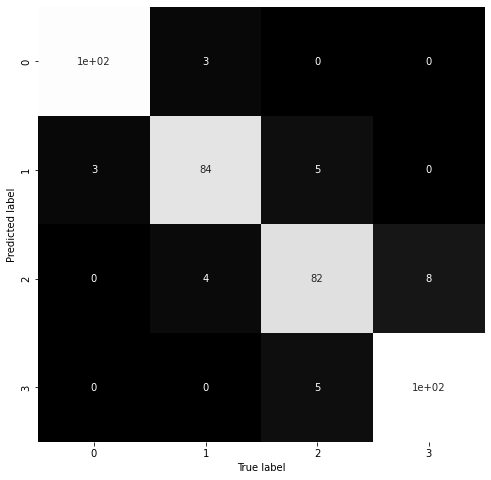

In [93]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(Y_pred, Y_val.values), annot=True, cbar=False, cmap="Greys_r")
plt.xlabel("True label")
plt.ylabel("Predicted label")

Classification Report...

In [95]:
from sklearn.metrics import classification_report

print(classification_report(Y_val, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       105
           1       0.91      0.92      0.92        91
           2       0.87      0.89      0.88        92
           3       0.95      0.93      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



#### Using SVM in sklearn

Copying train and test sets...

In [16]:
Xtrain_3 = Xtrain_scaled_features.copy()
Xtest_3 = Xtest_scaled_features.copy()
Ytrain_3 = Ytrain_2.copy()

In [151]:
Ytrain_3

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

Train & Validation splits...

In [17]:
from sklearn.model_selection import train_test_split

X_tra, X_v, y_tra, y_v = train_test_split(Xtrain_3, Ytrain_3, test_size=0.2, random_state=42)

Comparing models...

In [160]:
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC

models = {'SVC rbf': SVC(kernel = 'rbf',gamma = 'scale'),
          'SVC poly3': SVC(kernel = 'poly', degree=10, coef0=10, gamma = 'scale'),
          'SVC sigmoid': SVC(kernel = 'sigmoid',gamma = 'scale'),
        #   'SVC precomp': SVC(kernel = 'precomputed',gamma = 'scale'),
          'Linear SVC': LinearSVC(C=1, loss="hinge"),
          'Nu_SVC_linear': NuSVC(kernel = 'linear',gamma = 'scale'),
          'Nu_SVC_poly': NuSVC(kernel = 'poly',gamma = 'scale'),
          'Nu_SVC_sigmoid': NuSVC(kernel = 'sigmoid',gamma = 'scale'),
          'Nu_SVC_rbf': NuSVC(kernel = 'rbf',gamma = 'scale')
        #   'Nu_SVC_precomp': NuSVC(kernel = 'precomputed',gamma = 'scale'),
          }


model_scores = model_compare(models=models, X_train=X_tra, X_test=X_v, y_train=y_tra, y_test=y_v)

model_scores

{'SVC rbf': 0.8975,
 'SVC poly3': 0.9175,
 'SVC sigmoid': 0.4825,
 'Linear SVC': 0.7325,
 'Nu_SVC_linear': 0.9125,
 'Nu_SVC_poly': 0.7725,
 'Nu_SVC_sigmoid': 0.5125,
 'Nu_SVC_rbf': 0.8975}

Hyperparameter tuning...

In [ ]:
# rbf

In [161]:
parameter_grid = {'C': np.logspace(-1,2,5),
                  'gamma': np.logspace(-4,2,10),
                  'kernel': 'rbf'
                  }

In [163]:
gscv_rbf = GridSearchCV(SVC(), param_grid=parameter_grid, cv=5, verbose=True)

gscv_rbf.fit(X_tra, y_tra)

gscv_rbf.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'C': 100.0, 'gamma': 0.002154434690031882}

In [164]:
gscv_rbf.score(X_v,y_v)

0.92

In [ ]:
#poly

In [21]:
parameter_grid = {'C': [100,1000],
                  'gamma': [0.0001],
                  'kernel': ['poly'],
                  'degree': np.arange(3,7),
                  'coef0': [50,100]
                  }


In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

gscv_poly = GridSearchCV(SVC(), param_grid=parameter_grid, cv=5, verbose=True)

gscv_poly.fit(X_tra, y_tra)

gscv_poly.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'C': 100, 'coef0': 50, 'degree': 3, 'gamma': 0.0001, 'kernel': 'poly'}

In [23]:
gscv_poly.score(X_v,y_v)

0.935

Plotting various SVMs...

In [24]:
X = Xtrain_3[['ram','battery_power']].values
y = Ytrain_3.values

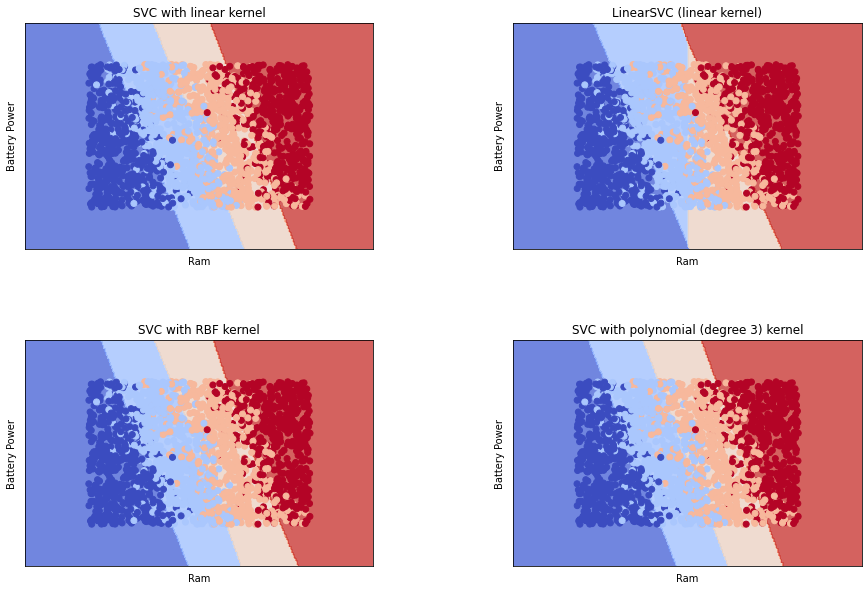

In [25]:
from sklearn import svm

plt.figure(figsize=(15, 10))

C= 1.0 # SVM regularization parameter
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.002, C=100).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, gamma=0.0001, coef0=50, C=100).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Ram')
    plt.ylabel('Battery Power')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()


#### Using Decision Tree Classifier

Copying train and test sets...

In [22]:
Xtrain_4 = Xtrain_scaled_features.copy()
Xtest_4 = Xtest_scaled_features.copy()
Ytrain_4 = Ytrain_2.copy()

Train validation splits...

In [23]:
from sklearn.model_selection import train_test_split

X_tra, X_v, y_tra, y_v = train_test_split(Xtrain_4, Ytrain_4, test_size=0.2, random_state=42)

Scoring Model with cross validation...

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

cross_val_score(DecisionTreeClassifier(random_state=0), X_tra, y_tra, cv=5)

array([0.828125, 0.825   , 0.884375, 0.815625, 0.846875])

Hyperparameter tuning...

In [29]:
parameter_grid = {'criterion': ['gini','entropy'],
                  'splitter': ['best','random'],
                  'min_samples_split': [2,4,6,8]
                  }

In [32]:
from sklearn.model_selection import GridSearchCV

gscv_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=parameter_grid, cv=5, verbose=True)

gscv_dt.fit(X_tra, y_tra)

gscv_dt.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'criterion': 'entropy', 'min_samples_split': 6, 'splitter': 'best'}

In [33]:
gscv_dt.score(X_v, y_v)

0.875

Generating Tree with best parameters...

In [35]:
model_DTC = DecisionTreeClassifier(criterion='entropy', min_samples_split=6, splitter='best')
model_DTC.fit(X_tra, y_tra)

from sklearn.tree import export_graphviz

export_graphviz(model_DTC, out_file=PATH+'mobile_price_tree.dot', feature_names=X_tra.columns, class_names=['Cheap','Low','Mid','High'], rounded=True, filled=True) 

#### Using Random Forest Classifier

Using (sub)train and validation splits from Decision Tree Classifier...

Cross validation score of model...

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

cross_val_score(RandomForestClassifier(random_state=0), X_tra, y_tra, cv=5)

array([0.8875  , 0.86875 , 0.853125, 0.859375, 0.871875])

Hyperparameter tuning...

In [25]:
parameter_grid = {'criterion': ['gini','entropy'],
                  'min_samples_split': [4,6,8],
                  'min_samples_leaf': [2,3,4],
                  'max_depth': [12,24],
                  'n_estimators':[100,200],
                  'n_jobs': [-1]  
                  }

In [26]:
from sklearn.model_selection import GridSearchCV

gscv_rfc = GridSearchCV(RandomForestClassifier(), param_grid=parameter_grid, cv=10, verbose=True)

gscv_rfc.fit(X_tra, y_tra)

gscv_rfc.best_params_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200,
 'n_jobs': -1}

In [27]:
gscv_rfc.score(X_v,y_v)

0.89

#### Using Gradient Boosting

Using (sub)train and validation sets from Decision Tree Classifier...

Finding best estimators and scoring model...

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error

gbct = GradientBoostingClassifier(n_estimators=120)
gbct.fit(X_tra, y_tra)

errors = [mean_squared_error(y_v, y_pred) for y_pred in gbct.staged_predict(X_v)]
bst_n_estimators = np.argmin(errors) + 1

gbct_best = GradientBoostingClassifier(n_estimators=bst_n_estimators)
gbct_best.fit(X_tra, y_tra)

GradientBoostingClassifier(n_estimators=77)

In [29]:
gbct_best.score(X_v,y_v)

0.895

Hyperparameter tuning....

In [33]:
parameter_grid = {'learning_rate': np.logspace(-1,1,3),
                  'n_estimators': [77,154],
                  'min_samples_split': [4,6,8],
                  'min_samples_leaf': [2,3,4],
                  'max_depth':[3,6,9]
                  }

In [34]:
from sklearn.model_selection import GridSearchCV

gscv_gbct = GridSearchCV(GradientBoostingClassifier(), param_grid=parameter_grid, cv=5, verbose=True)

gscv_gbct.fit(X_tra, y_tra)

gscv_gbct.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


{'learning_rate': 0.1,
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 154}

In [35]:
gscv_gbct.score(X_v,y_v)

0.885

#### Applying XGB

Using same (sub)train and validation splits as Decision Tree Classifier

Hyperparameter tuning...

In [40]:
parameter_grid = {'n_estimators': [77,154,231],
                  'max_depth': [12,18,24],
                  'learning_rate': [0.01,0.1],
                  'n_jobs': [-1],
                  'gamma': [0.1,1,10],
                  'importance_type': ['gain','weight'] 
}

In [42]:
from xgboost import XGBClassifier

gscv_xgbc = GridSearchCV(XGBClassifier(), param_grid=parameter_grid, cv=5, verbose=True)

gscv_xgbc.fit(X_tra, y_tra)

gscv_xgbc.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[12:17:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\lea

{'gamma': 1,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_depth': 24,
 'n_estimators': 77,
 'n_jobs': -1}

In [43]:
gscv_xgbc.score(X_v,y_v)

0.895

#### Using kNN

Using same (sub)train and validation splits as DTC...

Cross-val score for kNN...

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline

nca = NeighborhoodComponentsAnalysis()
knn = KNeighborsClassifier(n_jobs=-1)
nca_knn_pipe = Pipeline([('nca', nca), ('knn', knn)])

cross_val_score(nca_knn_pipe, X_tra, y_tra, cv=5)

array([0.93125 , 0.91875 , 0.890625, 0.903125, 0.90625 ])

Hyperparameter tuning...

In [31]:
parameter_grid = {'n_neighbors': [5,10,15],
                  'weights': ['uniform','distance'],
                  'p': [1,2]
                  }

In [32]:
from sklearn.model_selection import  GridSearchCV

nca.fit(X_tra, y_tra)

gscv_knn = GridSearchCV(knn, param_grid=parameter_grid, n_jobs=-1, cv=5, verbose=True)

gscv_knn.fit(nca.transform(X_tra),y_tra)

gscv_knn.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

In [35]:
gscv_knn.score(nca.transform(X_v),y_v)

0.9325

#### Using Naive Bayes

Using unstandardized training set for subtrain-validation splits...

In [36]:
from sklearn.model_selection import train_test_split

X_t_unst, X_v_unst, y_t2, y_v2 = train_test_split(Xtrain_2, Ytrain_2, test_size=0.2, random_state=123)

Cross-val scoring...

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

cross_val_score(MultinomialNB(), X_t_unst, y_t2, cv=5)

array([0.38125 , 0.353125, 0.453125, 0.434375, 0.3625  ])

#### Ensembling best performers

Using previous (sub)train and validation sets

Tuning models with the best hyperparameters...

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline


rfc = RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=2, min_samples_split=6, n_estimators=200, n_jobs=-1)
gbct = GradientBoostingClassifier(n_estimators=77)
svc_poly = SVC(C=100, coef0=50, degree=3, gamma=0.0001, kernel='poly', probability=True)
logreg = LogisticRegression(C=0.0001, penalty='none')
nca = NeighborhoodComponentsAnalysis()
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', p=2, n_jobs=-1)
nca_knn_pipe = Pipeline([('nca', nca), ('knn', knn)])

Scoring voting classifer...

In [55]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('rfc', rfc), ('gbc', gbct), ('svc_poly', svc_poly), ('logreg',logreg), ('nca on knn', nca_knn_pipe)], voting='soft')
voting.fit(X_tra, y_tra)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=12,
                                                     min_samples_leaf=2,
                                                     min_samples_split=6,
                                                     n_estimators=200,
                                                     n_jobs=-1)),
                             ('gbc',
                              GradientBoostingClassifier(n_estimators=77)),
                             ('svc_poly',
                              SVC(C=100, coef0=50, gamma=0.0001, kernel='poly',
                                  probability=True)),
                             ('logreg',
                              LogisticRegression(C=0.0001, penalty='none')),
                             ('nca on knn',
                              Pipeline(steps=[('nca',
                                  

In [56]:
voting.score(X_v,y_v)

0.9375

#### Using Dynamic Ensemble Selection

Creating destrain & destest splits...

In [57]:
from sklearn.model_selection import train_test_split

X_destrain, X_destest, y_destrain, y_destest = train_test_split(Xtrain_4, Ytrain_4, test_size=0.2, random_state=42)

Pooling & fitting best classifiers used in Voting Ensemble...

In [58]:
classifier_pool = [rfc, gbct, svc_poly, logreg, nca_knn_pipe]

for classifier in classifier_pool:
    classifier.fit(X_destrain, y_destrain)

Alternate pool - Bagging the voting classifier...

In [61]:
from sklearn.ensemble import BaggingClassifier

alt_classifier_pool = BaggingClassifier(VotingClassifier(estimators=[('rfc', rfc), ('gbc', gbct), ('svc_poly', svc_poly), ('logreg',logreg)], voting='soft'),
                                        n_estimators=50, n_jobs=-1)
alt_classifier_pool.fit(X_destrain, y_destrain)

BaggingClassifier(base_estimator=VotingClassifier(estimators=[('rfc',
                                                               RandomForestClassifier(criterion='entropy',
                                                                                      max_depth=12,
                                                                                      min_samples_leaf=2,
                                                                                      min_samples_split=6,
                                                                                      n_estimators=200,
                                                                                      n_jobs=-1)),
                                                              ('gbc',
                                                               GradientBoostingClassifier(n_estimators=77)),
                                                              ('svc_poly',
                                                     

Comparing the scores of various dynamic selectors...

In [74]:
from deslib.dcs import MCB
from deslib.dcs import OLA
from deslib.dcs import Rank
from deslib.des import DESP
from deslib.des import KNORAE
from deslib.des import KNORAU
from deslib.static import StackedClassifier
from deslib.static import Oracle

mcb = MCB(classifier_pool)
ola = OLA(classifier_pool)
rank = Rank(classifier_pool)
des_p = DESP(classifier_pool)
kne = KNORAE(classifier_pool)
knu = KNORAU(classifier_pool)
stacked = StackedClassifier(classifier_pool)
oracle = Oracle(classifier_pool, n_jobs=-1)

list_ds_methods = [method.fit(X_destrain, y_destrain) for method in
                   [mcb, ola, rank, des_p, kne, knu, stacked, oracle]]
names = ['MCB', 'OLA', 'Mod. Rank', 'DES-P', 'KNORA-E', 'KNORA-U', 'Stacked', 'Oracle']

i = 0
for ds_method in list_ds_methods:
    print("{} has a mean accuracy score of {}".format(names[i], ds_method.score(X_destest, y_destest)))
    i += 1

MCB has a mean accuracy score of 0.915
OLA has a mean accuracy score of 0.9
Mod. Rank has a mean accuracy score of 0.9
DES-P has a mean accuracy score of 0.935
KNORA-E has a mean accuracy score of 0.9275
KNORA-U has a mean accuracy score of 0.935
Stacked has a mean accuracy score of 0.9425
Oracle has a mean accuracy score of 0.9825
